In [1]:
import os

import pandas as pd

from graphs import load_dataset_to_graph
from measurements import get_graph_measurements, compare_graph_measurements, print_comparison_results
from recreate_graph import recreate_by_priority_rank_no_attributes, recreate_by_priority_rank, get_trained_model

Using TensorFlow backend.
/home/smoq/.virtualenvs/cna/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Processing highschool_2011
Comparison without any attributes


/home/smoq/.virtualenvs/cna/lib/python3.6/site-packages/networkx/algorithms/assortativity/correlation.py:287: RuntimeWarning: divide by zero encountered in double_scalars
  return (xy*(M-ab)).sum()/numpy.sqrt(vara*varb)


(KS test p-value)  degree_centrality: 0.0020122867425347545           [passed: False]
(KS test p-value)  closeness_centrality: 0.005044986488469964         [passed: False]
(KS test p-value)  betweenness_centrality: 7.5885154889784956e-06     [passed: False]
(KS test p-value)  pagerank: 2.04133252963713e-06                     [passed: False]
(abs distance)     average_shortest_path_length: 0.05791669382699949  [passed: True]
(abs distance)     diameter: 0.25                                     [passed: False]
(abs distance)     degree_centralization: 0.5308959298650237          [passed: False]
(abs distance)     closeness_centralization: 0.5009555895860657       [passed: False]
(abs distance)     betweenness_centralization: 0.05931203832421425    [passed: True]
(abs distance)     pagerank_centralization: 0.555687180855982         [passed: False]
(abs distance)     density: 0.004972214097689335                      [passed: True]
(abs distance)     degree_assortativity: inf             

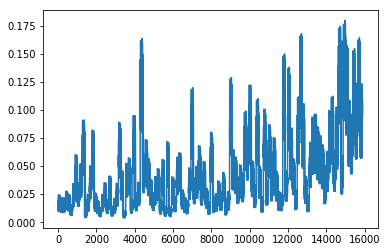

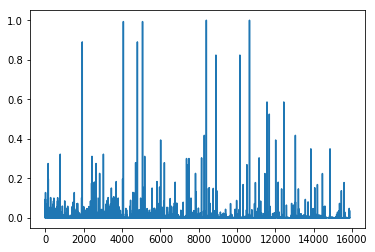

(KS test p-value)  degree_centrality: 0.0007516359865883434           [passed: False]
(KS test p-value)  closeness_centrality: 0.0004482025847002505        [passed: False]
(KS test p-value)  betweenness_centrality: 3.968252602909403e-06      [passed: False]
(KS test p-value)  pagerank: 5.14231331673983e-07                     [passed: False]
(abs distance)     average_shortest_path_length: 0.06805293005671077  [passed: True]
(abs distance)     diameter: 0.25                                     [passed: False]
(abs distance)     degree_centralization: 0.5404808029545874          [passed: False]
(abs distance)     closeness_centralization: 0.5994379755114898       [passed: False]
(abs distance)     betweenness_centralization: 0.05574518316764296    [passed: True]
(abs distance)     pagerank_centralization: 0.5711982075335011        [passed: False]
(abs distance)     density: 0.004972214097689335                      [passed: True]
(abs distance)     degree_assortativity: 0.99999978653882

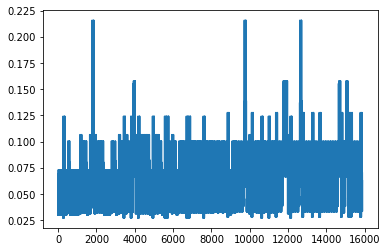

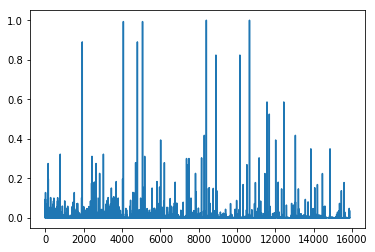

(KS test p-value)  degree_centrality: 0.0032124690911688775           [passed: False]
(KS test p-value)  closeness_centrality: 8.612049190927903e-05        [passed: False]
(KS test p-value)  betweenness_centrality: 2.041332529637141e-06      [passed: False]
(KS test p-value)  pagerank: 1.4275334770461814e-05                   [passed: False]
(abs distance)     average_shortest_path_length: 0.06971514242878561  [passed: True]
(abs distance)     diameter: 0.25                                     [passed: False]
(abs distance)     degree_centralization: 0.5823546165831763          [passed: False]
(abs distance)     closeness_centralization: 0.6844889141741854       [passed: False]
(abs distance)     betweenness_centralization: 0.03348383074530139    [passed: True]
(abs distance)     pagerank_centralization: 0.5906856478275755        [passed: False]
(abs distance)     density: 0.004972214097689335                      [passed: True]
(abs distance)     degree_assortativity: inf             

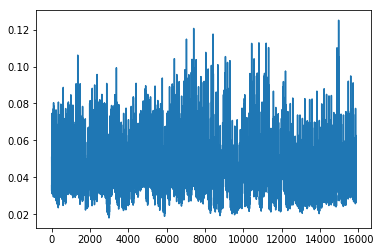

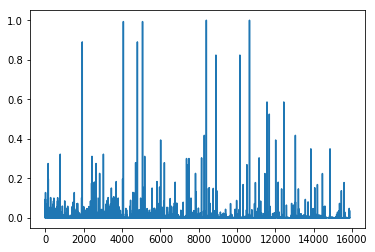

(KS test p-value)  degree_centrality: 0.0007516359865883434           [passed: False]
(KS test p-value)  closeness_centrality: 2.641725814496577e-05        [passed: False]
(KS test p-value)  betweenness_centrality: 7.5885154889784956e-06     [passed: False]
(KS test p-value)  pagerank: 2.04133252963713e-06                     [passed: False]
(abs distance)     average_shortest_path_length: 0.06818329965452052  [passed: True]
(abs distance)     diameter: 0.25                                     [passed: False]
(abs distance)     degree_centralization: 0.5503878566522029          [passed: False]
(abs distance)     closeness_centralization: 0.6060212191460036       [passed: False]
(abs distance)     betweenness_centralization: 0.06503759579524167    [passed: True]
(abs distance)     pagerank_centralization: 0.5719034408475219        [passed: False]
(abs distance)     density: 0.004972214097689335                      [passed: True]
(abs distance)     degree_assortativity: inf             

In [2]:
prepared_datasets_path = 'prepared_datasets'
prepared_dataframes_path = 'prepared_dataframes'
delimiter = '\t'

prepared_dataset_names = [
    #'primary_school', 'workplace', 
    'highschool_2011', #'highschool_2012', 'hospital', 
    #'moreno_blogs', 'moreno_sheep', 'moreno_seventh',
    # big datasets
    #'petster-hamster', 'email-Eu'
]

for dataset_name in prepared_dataset_names:
    print('Processing {}'.format(dataset_name))
    dataset_path = os.path.join(prepared_datasets_path, dataset_name)
    dataframe_path = os.path.join(prepared_dataframes_path, dataset_name)
    graph = load_dataset_to_graph(dataset_path, node_limit=500)
    
    # no attrs
    print('Comparison without any attributes')
    new_graph = recreate_by_priority_rank_no_attributes(graph)
    
    graph_measurements = get_graph_measurements(graph)
    new_graph_measurements = get_graph_measurements(new_graph)
    comparison = compare_graph_measurements(graph_measurements, new_graph_measurements)
    print_comparison_results(comparison)
    print()
    
    # only graph attrs
    print('Comparison with only graph attributes')
    graph_attrs_dataframe_path = os.path.join(dataframe_path, 'graph_attrs.csv')
    df = pd.read_csv(graph_attrs_dataframe_path, delimiter=delimiter)
    
    model = get_trained_model(df, epochs=4)
    new_graph = recreate_by_priority_rank(graph, df, model, show_graphs=True)
    
    graph_measurements = get_graph_measurements(graph)
    new_graph_measurements = get_graph_measurements(new_graph)
    comparison = compare_graph_measurements(graph_measurements, new_graph_measurements)
    print_comparison_results(comparison)
    print()
    
    # only real attrs
    print('Comparison with only real attributes')
    real_attrs_dataframe_path = os.path.join(dataframe_path, 'real_attrs.csv')
    df = pd.read_csv(real_attrs_dataframe_path, delimiter=delimiter)
    
    model = get_trained_model(df, epochs=4)
    new_graph = recreate_by_priority_rank(graph, df, model, show_graphs=True)
    
    graph_measurements = get_graph_measurements(graph)
    new_graph_measurements = get_graph_measurements(new_graph)
    comparison = compare_graph_measurements(graph_measurements, new_graph_measurements)
    print_comparison_results(comparison)
    print()
    
    # both graph and real attrs
    print('Comparison with both graph and real attributes')
    graph_real_attrs_dataframe_path = os.path.join(dataframe_path, 'graph_real_attrs.csv')
    df = pd.read_csv(graph_real_attrs_dataframe_path, delimiter=delimiter)
    
    model = get_trained_model(df, epochs=4)
    new_graph = recreate_by_priority_rank(graph, df, model, show_graphs=True)
    
    graph_measurements = get_graph_measurements(graph)
    new_graph_measurements = get_graph_measurements(new_graph)
    comparison = compare_graph_measurements(graph_measurements, new_graph_measurements)
    print_comparison_results(comparison)
    print()